# data preprocessing 

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/books-sales-and-ratings")

print("Path to dataset files:", path)

/Users/emilianosandoval/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/emilianosandoval/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/emilianosandoval/.cache/kagglehub/datasets/thedevastator/books-sales-and-ratings/versions/2


In [8]:
import os
import pandas as pd

In [5]:
dataset_path = "/Users/emilianosandoval/.cache/kagglehub/datasets/thedevastator/books-sales-and-ratings/versions/2"

# List files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['Books_Data_Clean.csv']


In [9]:
# List all CSV files in the directory
csv_files = [file for file in os.listdir(dataset_path) if file.endswith(".csv")]

# Read each CSV file into a dictionary of DataFrames
dataframes = {file: pd.read_csv(os.path.join(dataset_path, file)) for file in csv_files}

# Print the keys (file names) to confirm
print("Loaded DataFrames:", dataframes.keys())

# cargar dataframe
df_books_clean = dataframes["Books_Data_Clean.csv"]

Loaded DataFrames: dict_keys(['Books_Data_Clean.csv'])


In [ ]:
# Select only numeric columns
df_numeric = df_books_clean.select_dtypes(include=["number"])

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

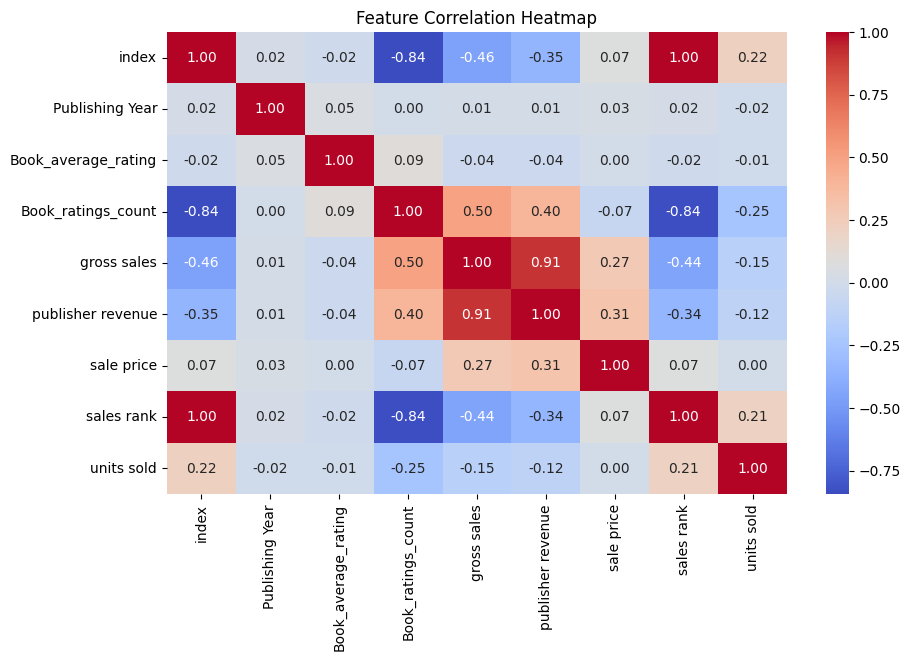

In [18]:
# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
correlation_matrix.Book_ratings_count

index                 -0.843338
Publishing Year        0.000290
Book_average_rating    0.093033
Book_ratings_count     1.000000
gross sales            0.502120
publisher revenue      0.401315
sale price            -0.068573
sales rank            -0.835446
units sold            -0.252232
Name: Book_ratings_count, dtype: float64

* gross sales: 0.50
* publisher revenue: 0.40
  * Esto sugiere que el rendimiento de las ventas influye en el recuento de valoraciones, lo cual tiene sentido, ya que cuantas más copias se vendan, más posibilidades habrá de recibir reseñas.
* sales rank: -0.83
* units sold: -0.25
  * Nos dice que mientras el rank sea bajo (mejor) tendra mayor reviews, esto es, el libro vende mas.
  * unidades vendidas es interesante porque que venda mas no implica--necesariamente--que tenga mas reviews. 
  * esta relacion no es lineal, por lo que es conveniente usar random forests como modelo